In [1]:
## Set up constants.
xmax = 2.0
wave_vel = 1.0  # `C' in equations
cfl = 2.0
nx, nt = 41, 10

dx = xmax/(nx-1)
dt = cfl*dx/wave_vel
tmax = dt*nt

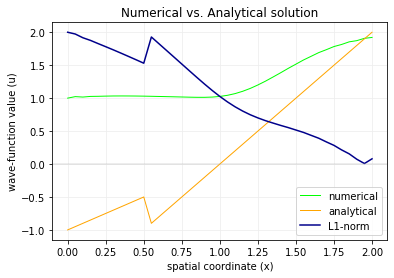

Running time: 0.8807605000001786


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from timeit import default_timer as timer

def numerical_solution(j, fname):
    with open(fname, mode='r') as f:
        ## Get the j-th line from the data (starting from 0 as first line)
        line = next(itertools.islice(f, j, j+1), None)
    
    u_str = line.strip().split(',')
    u = np.array(list(map(float, u_str)))
    return u

def analytical_solution(j, c=wave_vel):
    x = lambda i: i * dx
    t = lambda j: j * dt
    
    v = np.zeros(nx)
    for i in range(nx):
        u = 1. if x(i) <= .5 else 2.
        v[i] = u * (x(i) - c*t(j))
        # print(f'{i=} {j=} {x(i)=:.2f} {t(j)=:.2f} {u=} {v[i]=:.2f}')

    return v

def norm(u, v):
    return [abs(x-y) for x, y in zip(u, v)]

start = timer()  # BEGIN TIMING

u_numerical = numerical_solution(j=nt, fname=f'./u_{nt}.csv')
v_analytical = analytical_solution(j=nt)
norm_uv = norm(u_numerical, v_analytical)

x = np.linspace(0, xmax, nx)
plt.plot(x, u_numerical, label='numerical', color='lime', linewidth=1.0)
plt.plot(x, v_analytical, label='analytical', color='orange', linewidth=1.0)
plt.plot(x, norm_uv, label='L1-norm', color='darkblue')
plt.xlabel('spatial coordinate (x)')
plt.ylabel('wave-function value (u)')
plt.title('Numerical vs. Analytical solution')
plt.axhline(0, color='darkgrey', linewidth=0.4, linestyle='solid')
plt.grid(b=True, which='major', color='#eeeeee', linestyle='-')
plt.grid(b=True, which='minor', color='#eeeeee', linestyle='--')
plt.legend()
plt.savefig('Q3_L1-norm_Plot.png', transparent=False, dpi=300)
plt.show()

end = timer()  # END TIMING
print("Running time:", end - start)